# Alzheimers Disease Prediction

<div align="center">
  <img src="https://cdn.pixabay.com/photo/2023/01/13/11/39/man-7715873_1280.png" width="1000"/>
</div>
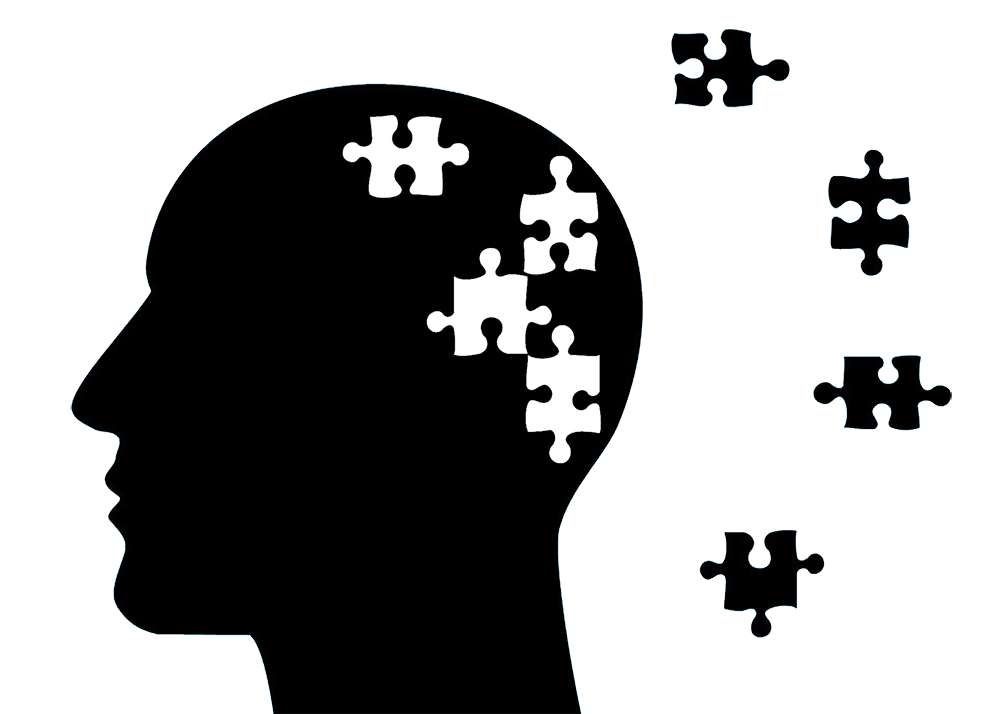
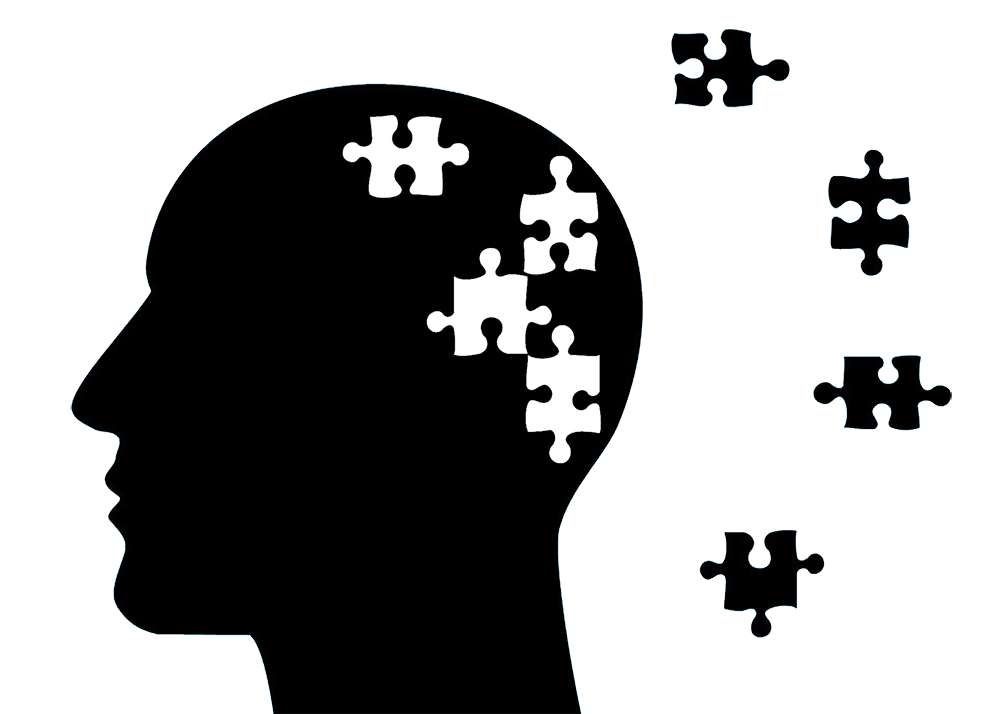
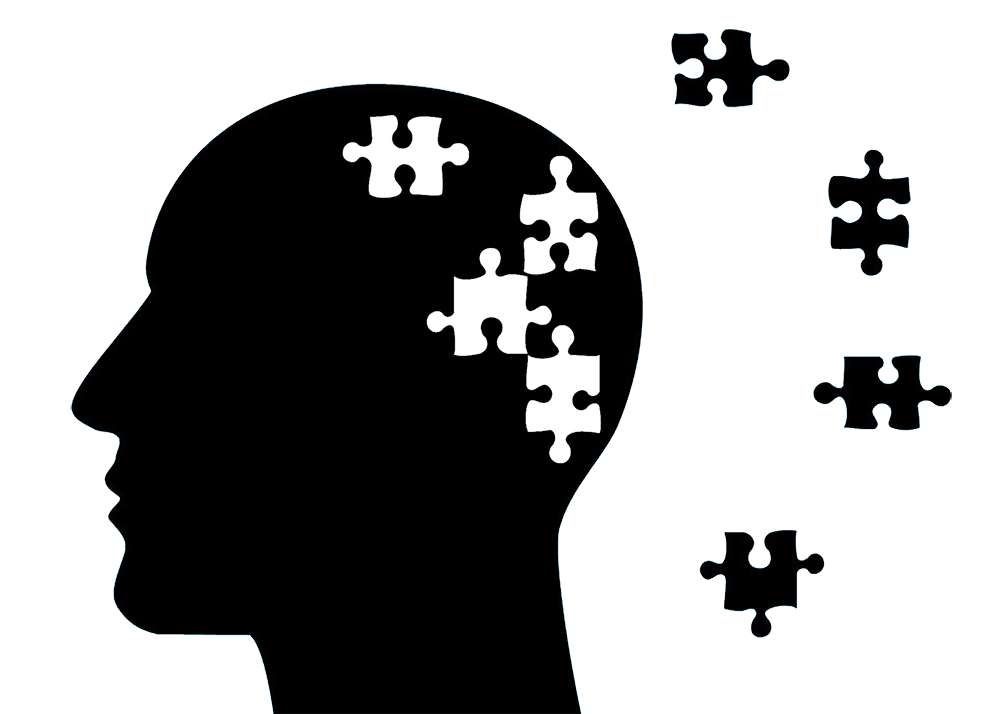
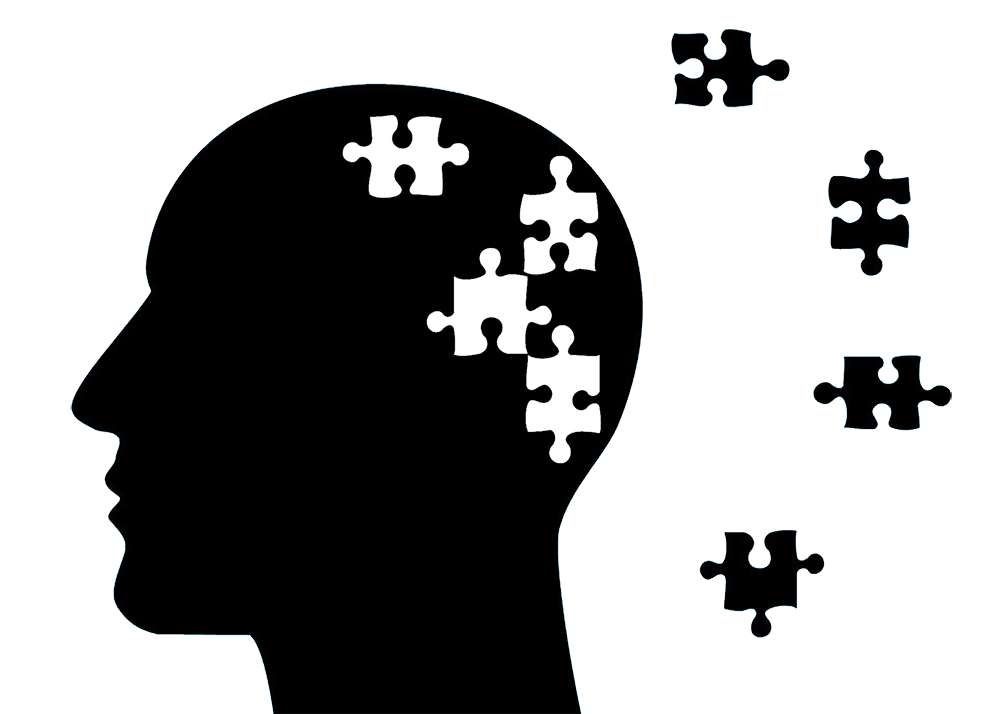

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 2. Understanding our data

In [2]:
df = pd.read_csv("/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv")

In [3]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
PatientID,4751,4752,4753,4754,4755,4756,4757,4758,4759,4760,4761,4762,4763,4764,4765,4766,4767,4768,4769,4770
Age,73,89,73,74,89,86,68,75,72,87,89,78,84,78,64,69,63,65,72,68
Gender,0,0,0,1,0,1,0,0,1,0,0,0,1,1,1,0,1,1,0,0
Ethnicity,0,0,3,0,0,1,3,0,1,0,3,0,0,0,0,0,1,0,0,0
EducationLevel,2,0,1,1,0,1,2,1,0,0,1,2,1,1,2,1,2,1,2,3
BMI,22.927749,26.827681,17.795882,33.800817,20.716974,30.626886,38.387622,18.776009,27.833188,35.456302,39.463034,22.463383,26.770946,28.870652,27.942863,18.045917,22.822896,16.333283,37.932469,20.0414
Smoking,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356,4.140144,0.646047,13.723826,12.167848,16.028688,9.811292,19.300183,10.978022,10.194706,2.17578,8.116832,4.433961,4.161795,9.385603,18.426364
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461,0.211062,9.257695,4.649451,1.53136,6.440773,8.81995,3.834639,3.978079,0.631281,9.714566,2.956495,7.182895,1.30632,7.12794,4.060714
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498,1.584922,5.897388,8.341903,6.736882,8.086019,0.43402,8.27919,7.024417,1.653281,5.317232,7.570633,7.929486,2.888936,3.314983,3.361536


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


In [6]:
df.duplicated().any()

False

In [7]:
df.isna().any().any()

False

In [8]:
# Unique values in each column
for col in df.columns: print(f"{col}: {df[col].nunique()}")

PatientID: 2149
Age: 31
Gender: 2
Ethnicity: 4
EducationLevel: 4
BMI: 2149
Smoking: 2
AlcoholConsumption: 2149
PhysicalActivity: 2149
DietQuality: 2149
SleepQuality: 2149
FamilyHistoryAlzheimers: 2
CardiovascularDisease: 2
Diabetes: 2
Depression: 2
HeadInjury: 2
Hypertension: 2
SystolicBP: 90
DiastolicBP: 60
CholesterolTotal: 2149
CholesterolLDL: 2149
CholesterolHDL: 2149
CholesterolTriglycerides: 2149
MMSE: 2149
FunctionalAssessment: 2149
MemoryComplaints: 2
BehavioralProblems: 2
ADL: 2149
Confusion: 2
Disorientation: 2
PersonalityChanges: 2
DifficultyCompletingTasks: 2
Forgetfulness: 2
Diagnosis: 2
DoctorInCharge: 1


In [9]:
# Drop unnecessary columns
df.drop(columns=['DoctorInCharge', 'PatientID'], inplace=True)

# 3. Data Visualization

## 3.1. Categorical Columns

In [10]:
# Array with categorical column names
categorical_columns = [col for col in df.columns if df[col].nunique() < 5]
categorical_columns.remove('Diagnosis')
categorical_columns

['Gender',
 'Ethnicity',
 'EducationLevel',
 'Smoking',
 'FamilyHistoryAlzheimers',
 'CardiovascularDisease',
 'Diabetes',
 'Depression',
 'HeadInjury',
 'Hypertension',
 'MemoryComplaints',
 'BehavioralProblems',
 'Confusion',
 'Disorientation',
 'PersonalityChanges',
 'DifficultyCompletingTasks',
 'Forgetfulness']

In [11]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

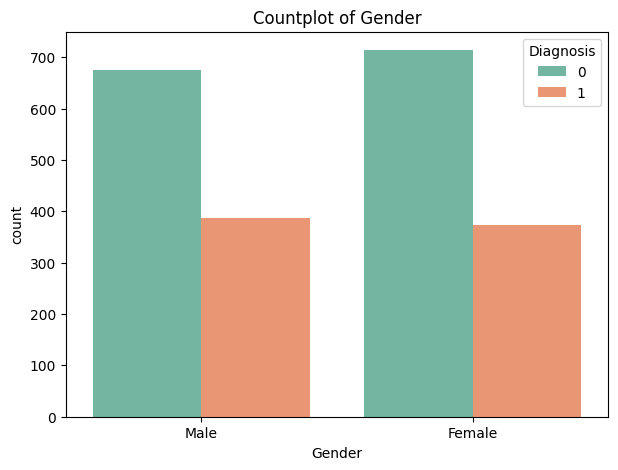

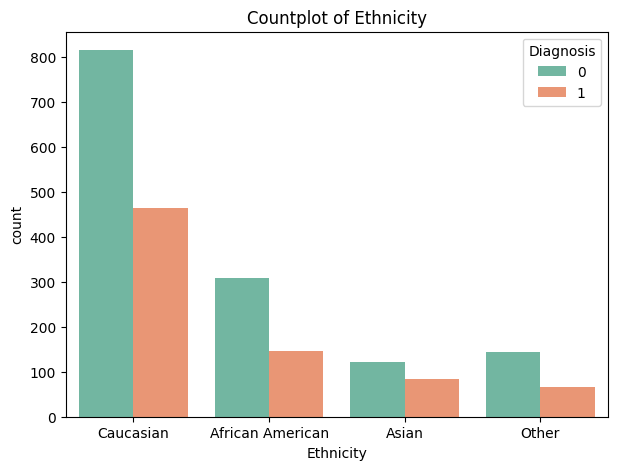

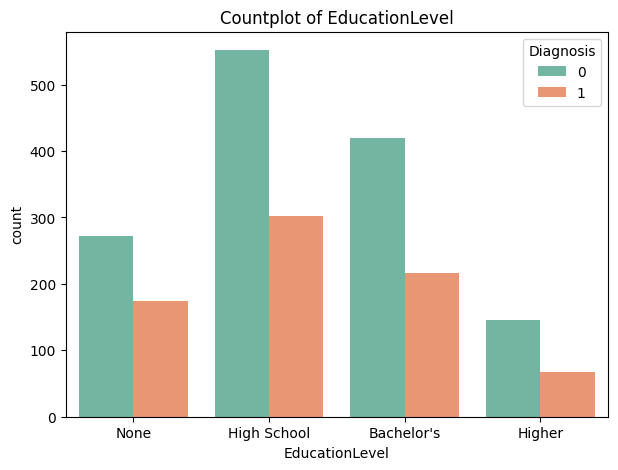

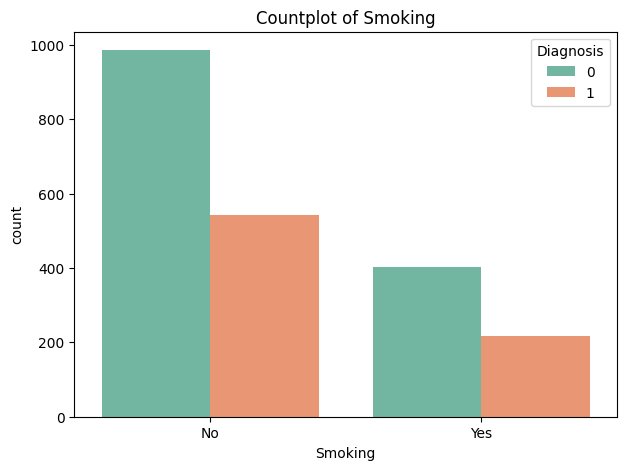

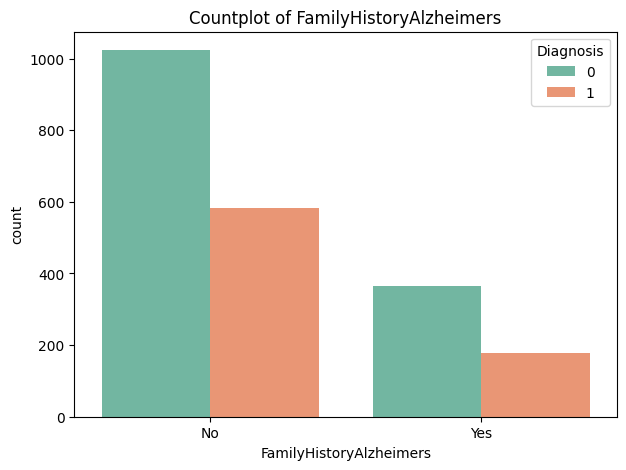

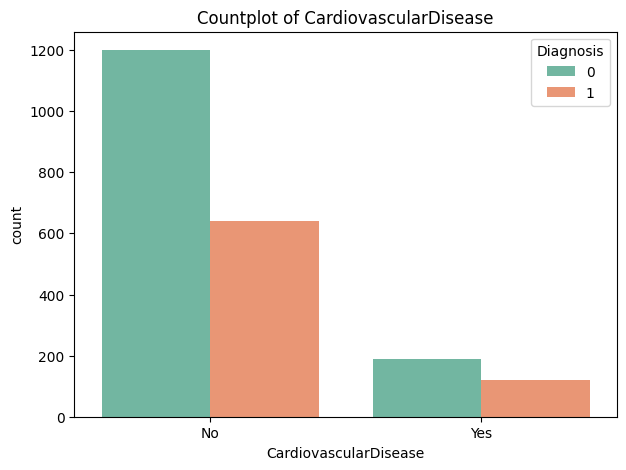

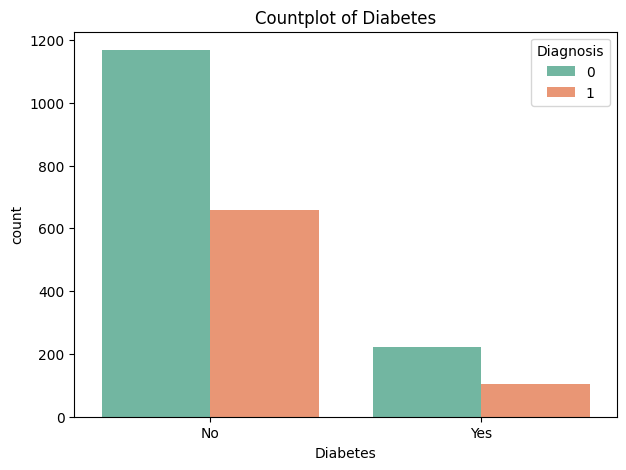

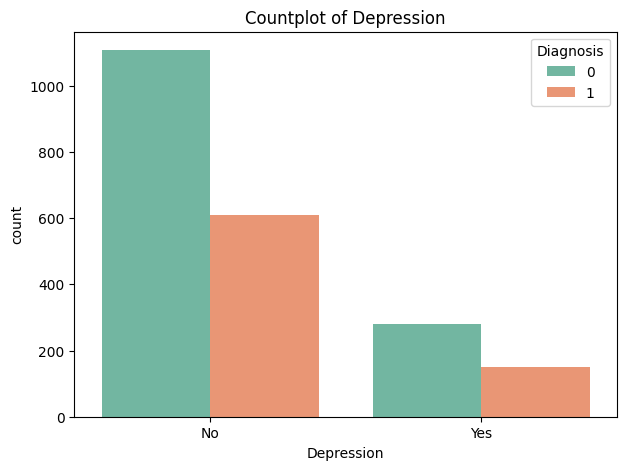

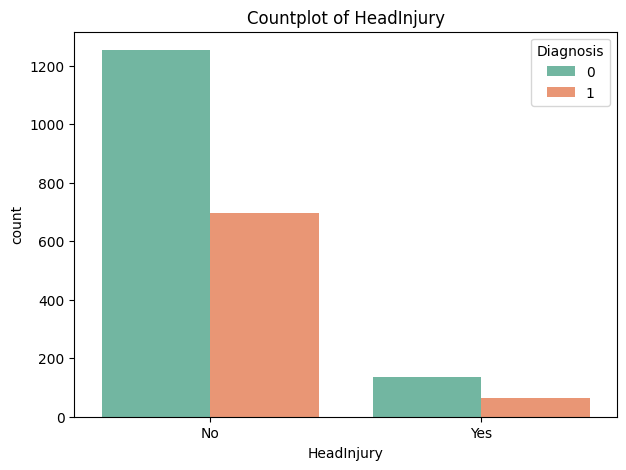

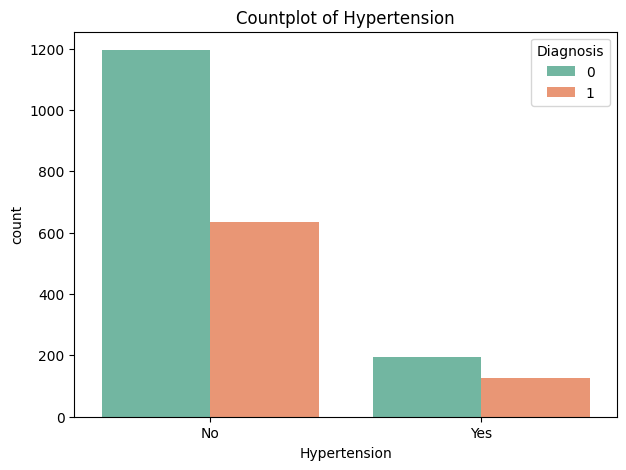

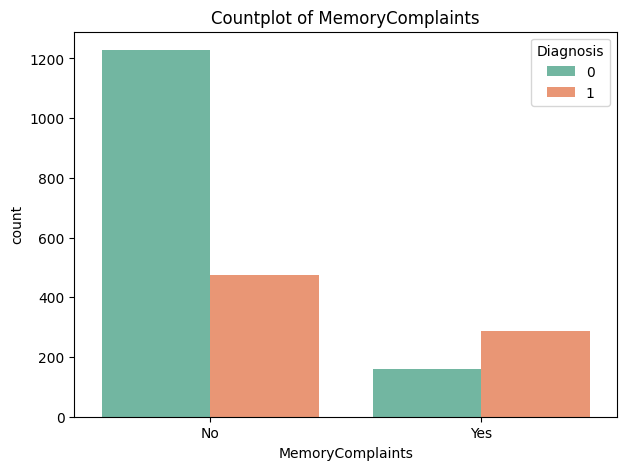

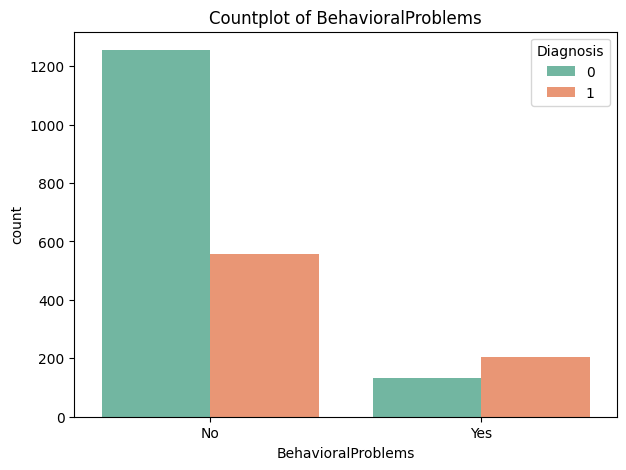

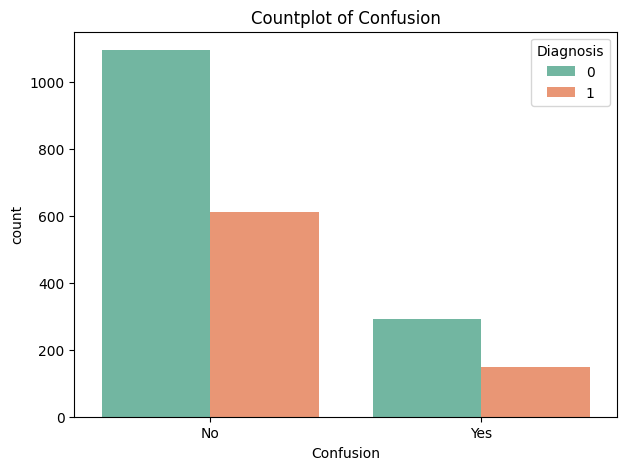

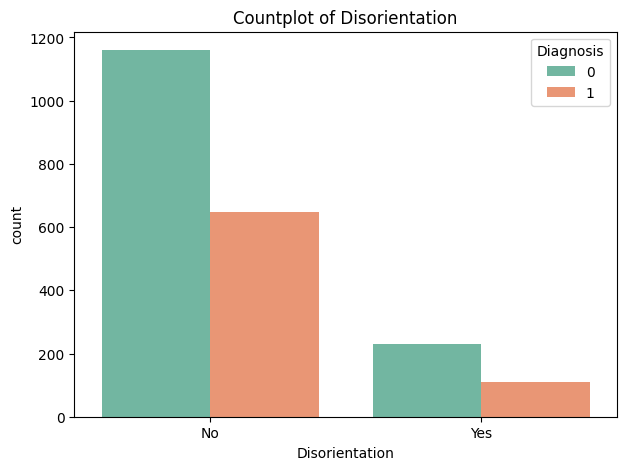

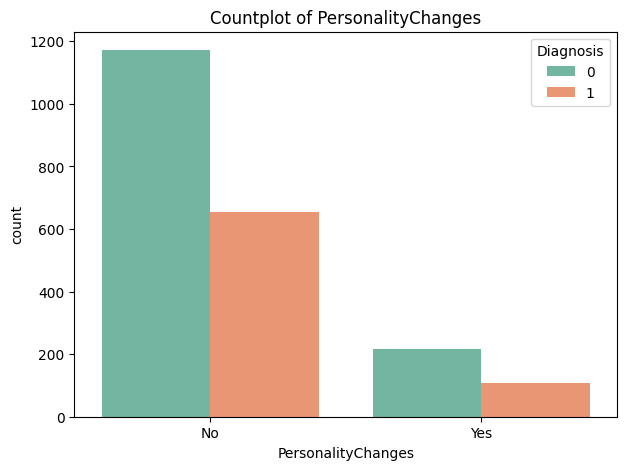

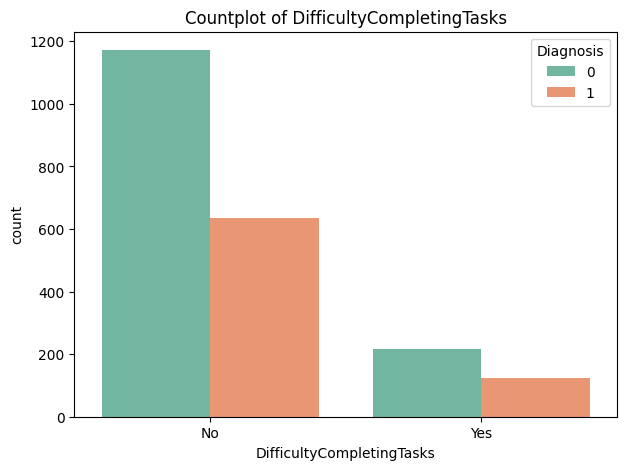

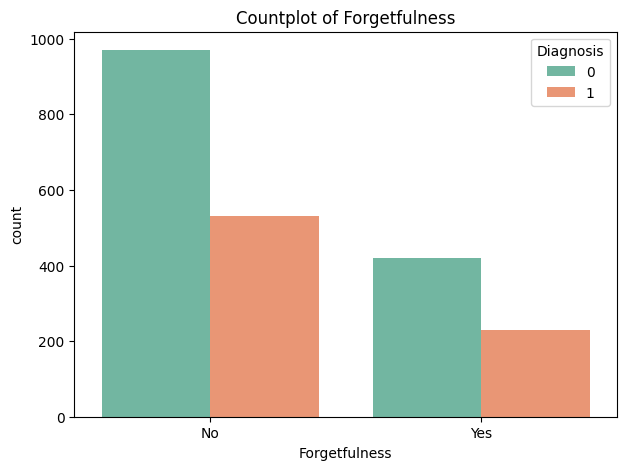

In [12]:
# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(7,5))
    sns.countplot(data=df, x=column, hue='Diagnosis', palette='Set2')
    plt.title(f'Countplot of {column}')

    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()

We can see that BehavioralProblems and MemoryComplaints have the biggest impact on our target variable - Diagnosis.

## 3.2. Numerical columns

In [13]:
# Array with numerical column names
numerical_columns = [col for col in df.columns if df[col].nunique() >= 5]
numerical_columns

['Age',
 'BMI',
 'AlcoholConsumption',
 'PhysicalActivity',
 'DietQuality',
 'SleepQuality',
 'SystolicBP',
 'DiastolicBP',
 'CholesterolTotal',
 'CholesterolLDL',
 'CholesterolHDL',
 'CholesterolTriglycerides',
 'MMSE',
 'FunctionalAssessment',
 'ADL']

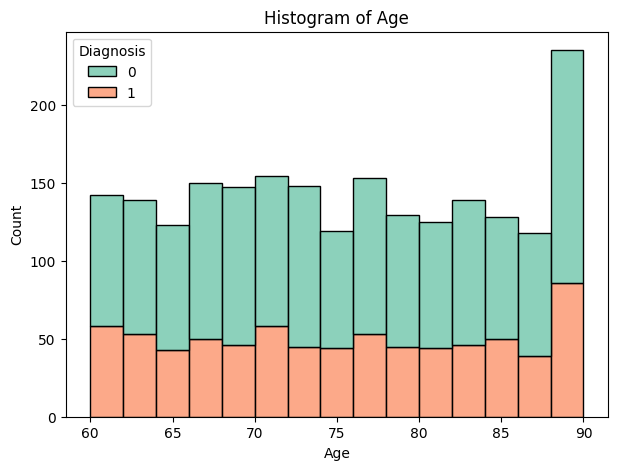

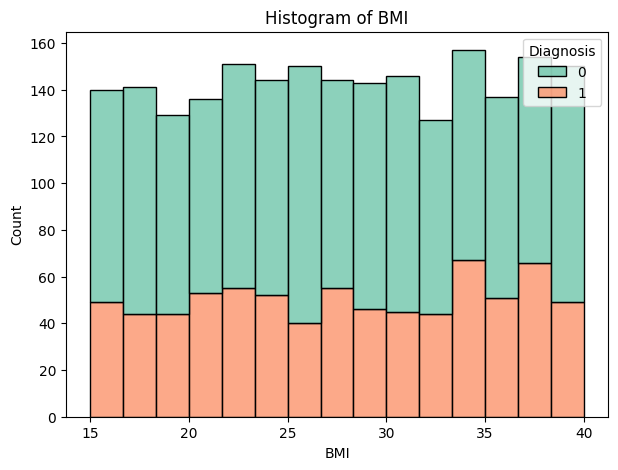

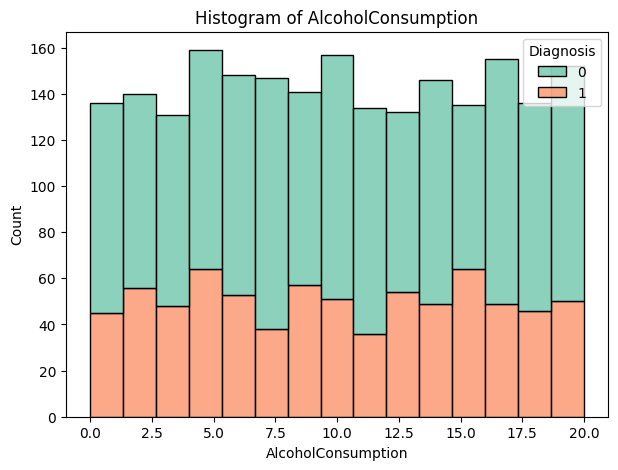

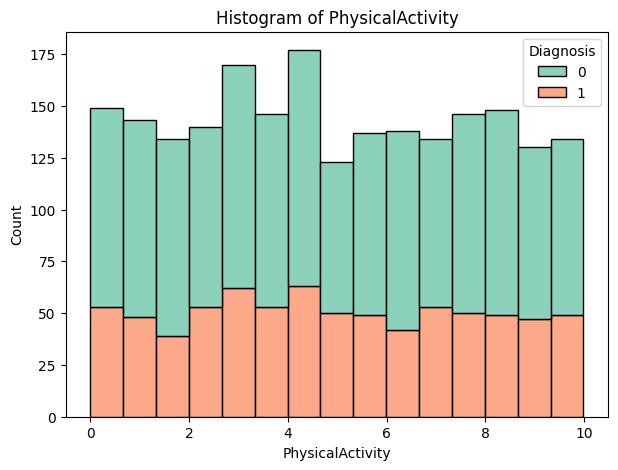

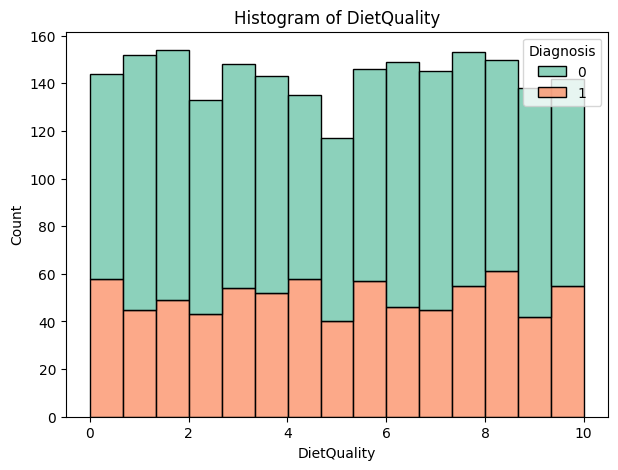

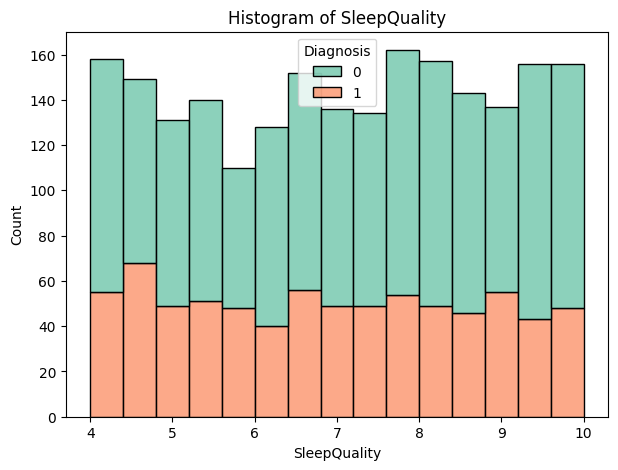

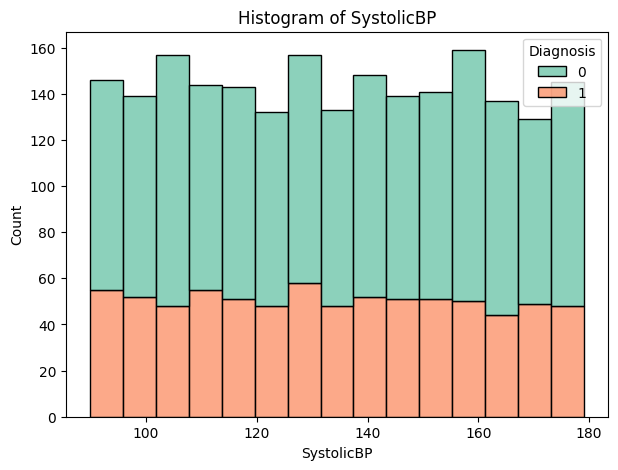

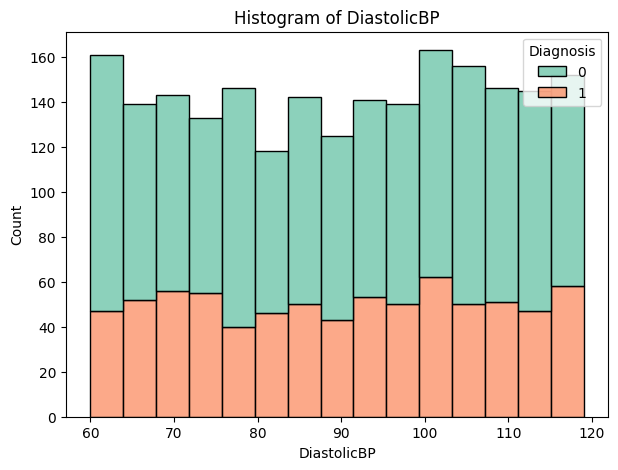

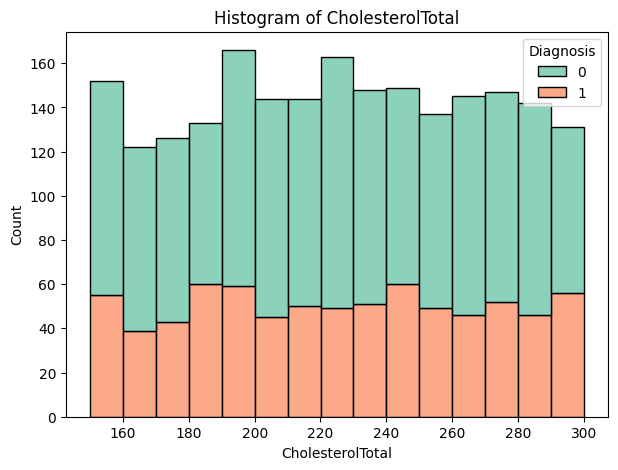

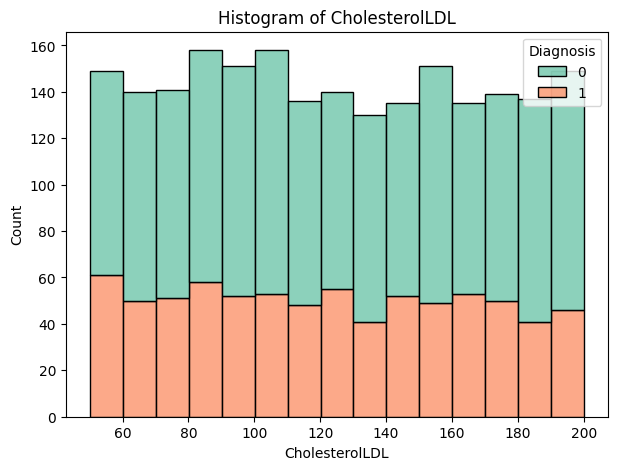

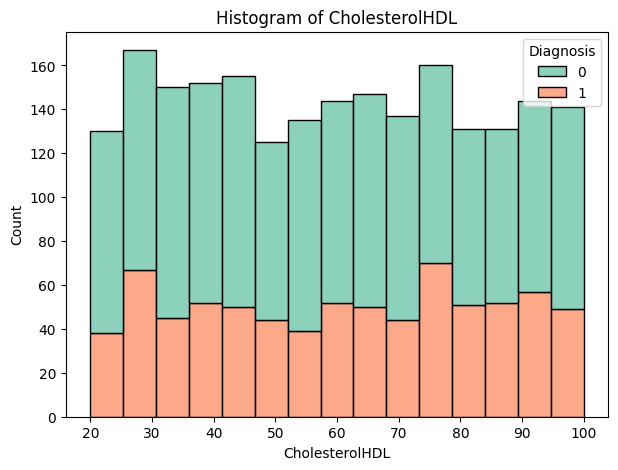

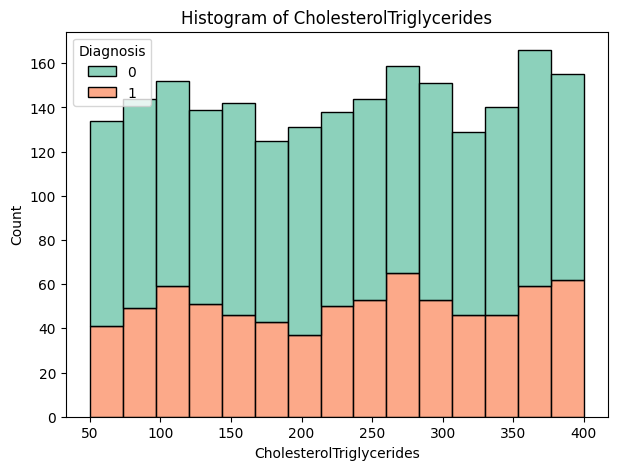

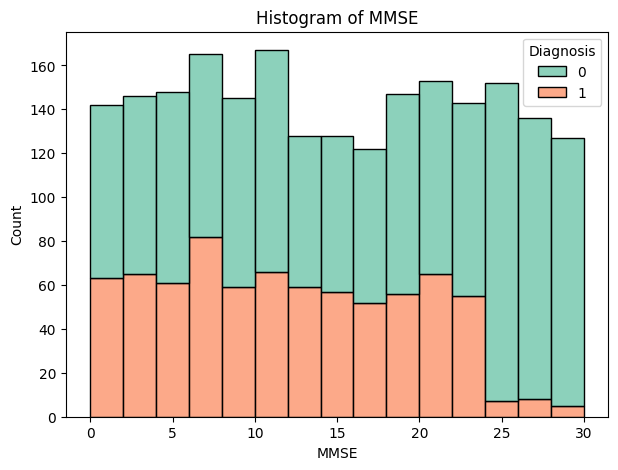

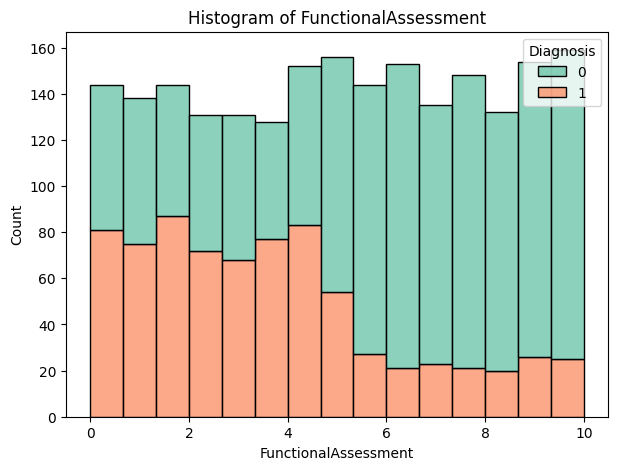

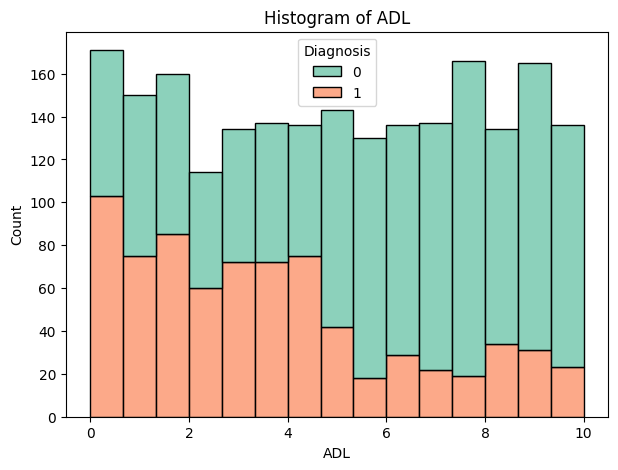

In [14]:
for column in numerical_columns:
    plt.figure(figsize=(7, 5))
    sns.histplot(data=df, x=column, hue='Diagnosis', multiple='stack', palette='Set2', bins=15)
    plt.title(f'Histogram of {column}')
    plt.show()

We can see that MMSE, FunctionalAssessment and ADL have the biggest impact on our target variable - Diagnosis.

## 3.3. Correlations matrix

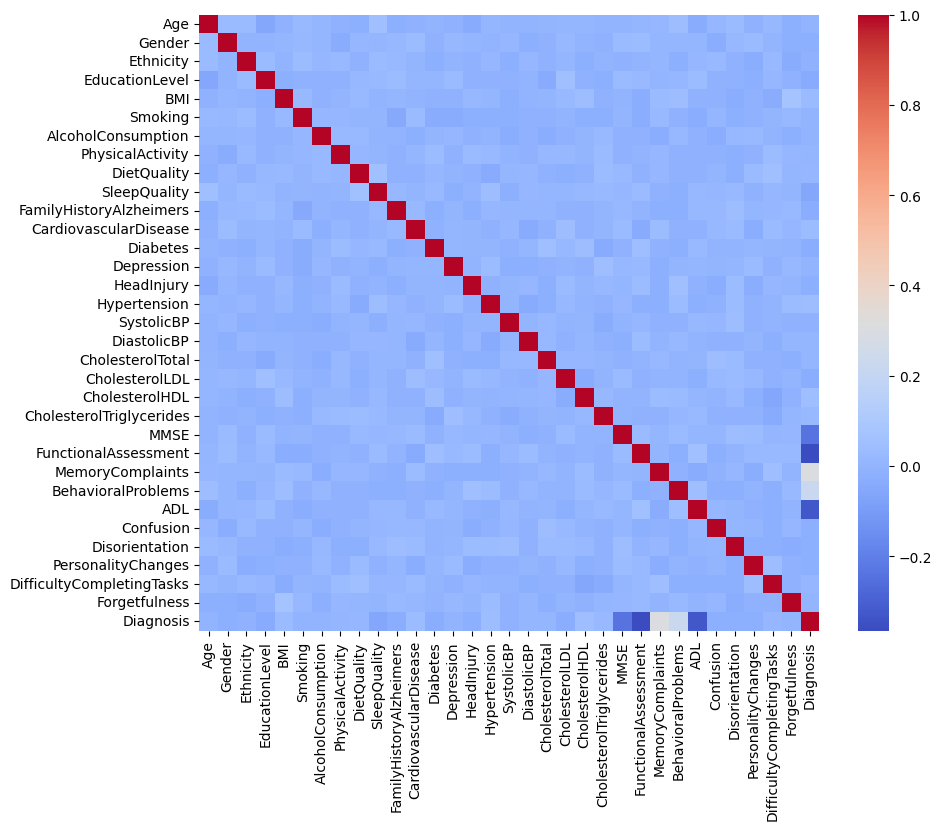

In [15]:
df_corr = df[['MemoryComplaints', 'BehavioralProblems', 'Diagnosis']]
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

We can see that columns "MemoryComplaints" and "BehavioralProblems" have the best correlation and columns "MMSE", "FunctionalAssessment" and "ADL" have inverse correlation with our target variable - Diagnosis.

## 3.4. Target variable

Text(0.5, 1.0, 'Distribution of diagnosis')

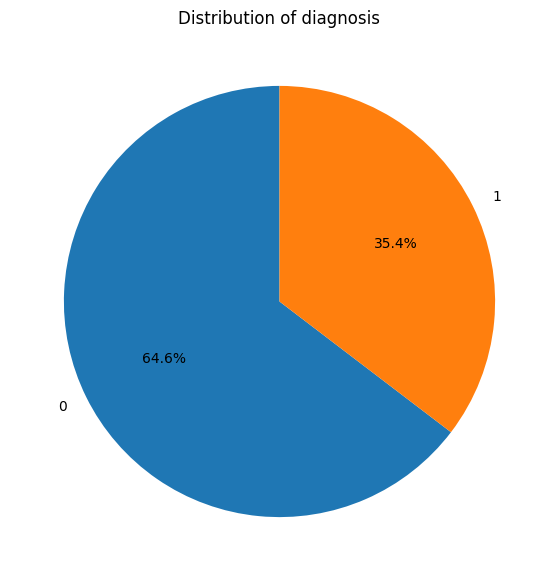

In [16]:
class_counts = df['Diagnosis'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of diagnosis')

Our target variable is moderately imbalanced, with 65% of instances being 0 and 35% being 1.

# 4. Data Pre-processing

In [17]:
X = df.drop(columns='Diagnosis')
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, shuffle = True)

numerical_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [18]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# 5. Data Modelling

In [19]:
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def euclidean_distance(x1, x2):
    return np.sum(np.abs(x1 - x2) ** 2) ** (1/2)

def minkowski_distance(x1, x2):
    return np.sum(np.abs(x1 - x2) ** 3) ** (1/3)

metrics = [manhattan_distance, euclidean_distance, minkowski_distance]

In [20]:
def knn_predict(X_train, y_train, x_test, metric, k):
    distances = []

    for i in range(len(X_train)):
        dist = metric(X_train[i], x_test)
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for (_, label) in distances[:k]]

    return max(set(k_nearest_labels), key=k_nearest_labels.count)

def evaluate_knn(X_train, y_train, X_test, y_test, metric, k):
    correct = 0
    for i in range(len(X_test)):
        prediction = knn_predict(X_train, y_train, X_test[i], metric, k)
        if prediction == y_test[i]:
            correct += 1
    return correct / len(X_test)

In [21]:
print("Dokładność manhattan metric:", evaluate_knn(X_train_np, y_train_np, X_test_np, y_test_np, manhattan_distance, k=3))
print("Dokładność euclidean metric:", evaluate_knn(X_train_np, y_train_np, X_test_np, y_test_np, euclidean_distance, k=3))
print("Dokładność minkowski metric:", evaluate_knn(X_train_np, y_train_np, X_test_np, y_test_np, minkowski_distance, k=3))

Dokładność manhattan metric: 0.7271317829457364
Dokładność euclidean metric: 0.7224806201550388
Dokładność minkowski metric: 0.7333333333333333


In [22]:
for metric in metrics:
    for k in range(1, 20, 2):
        print(f"Dokładność {metric.__name__} dla k={k}:", evaluate_knn(X_train_np, y_train_np, X_test_np, y_test_np, metric, k))

Dokładność manhattan_distance dla k=1: 0.6775193798449612
Dokładność manhattan_distance dla k=3: 0.7271317829457364
Dokładność manhattan_distance dla k=5: 0.7534883720930232
Dokładność manhattan_distance dla k=7: 0.751937984496124
Dokładność manhattan_distance dla k=9: 0.7643410852713178
Dokładność manhattan_distance dla k=11: 0.7736434108527132
Dokładność manhattan_distance dla k=13: 0.7813953488372093
Dokładność manhattan_distance dla k=15: 0.7875968992248062
Dokładność manhattan_distance dla k=17: 0.786046511627907
Dokładność manhattan_distance dla k=19: 0.7844961240310078
Dokładność euclidean_distance dla k=1: 0.6883720930232559
Dokładność euclidean_distance dla k=3: 0.7224806201550388
Dokładność euclidean_distance dla k=5: 0.7488372093023256
Dokładność euclidean_distance dla k=7: 0.7472868217054264
Dokładność euclidean_distance dla k=9: 0.7534883720930232
Dokładność euclidean_distance dla k=11: 0.7643410852713178
Dokładność euclidean_distance dla k=13: 0.7705426356589147
Dokładnoś

Największa dokładność została uzyskana dla metryki Manhattan i k = 5.

In [23]:
df_significant = df[['BehavioralProblems', 'MemoryComplaints', 'MMSE', 'ADL', 'FunctionalAssessment']]

In [24]:
X = df_significant
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, shuffle = True)

numerical_columns = ['MMSE', 'FunctionalAssessment', 'ADL']
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [25]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [26]:
evaluate_knn(X_train_np, y_train_np, X_test_np, y_test_np, manhattan_distance, k=5)

0.9279069767441861